In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
2036,2036,4051,4052,What can I do to practice my English?,How can I continue to improve my English?,1
48583,48583,32781,37441,How can I make money from YouTube?,How can I earn money in YouTube?,1
66144,66144,114692,114693,Is it true that there are 7 other people in th...,How do they know exactly how many people are i...,0
60038,60038,52331,1932,What is the trick to maintaining long distance...,Do long distance relationships work?,1
224349,224349,4235,332418,What is it like to live and work in Dubai?,What are the cons of living/working in Dubai?,0
296250,296250,418427,418428,What does Gibbons v. Ogden establish?,What was Gibbons v. Ogden?,1
174539,174539,94104,14215,What is/are your failure story?,What's your failure stories?,1
102680,102680,169860,169861,What are some things that monkeys like to do?,What are some things monkeys do all day?,0
376884,376884,177167,405330,Is there some way to easily download all attac...,Is there a way to extract (download) all photo...,0
241984,241984,108065,354099,Why do some Americans think they are the no.1 ...,Why do some Americans think America has to be ...,1


In [5]:
new_df = df.sample(40000, random_state=42)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.duplicated().sum()

0

In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
31500,31500,58072,58073,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...,0
270887,270887,54575,10365,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/...",1
384362,384362,516388,516389,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...,0
72809,72809,125038,125039,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...,0
147054,147054,124558,6851,Why do we need to reading books?,Why should we read more books?,1


### EDA

is_duplicate
0    25163
1    14837
Name: count, dtype: int64
is_duplicate
0    62.9075
1    37.0925
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

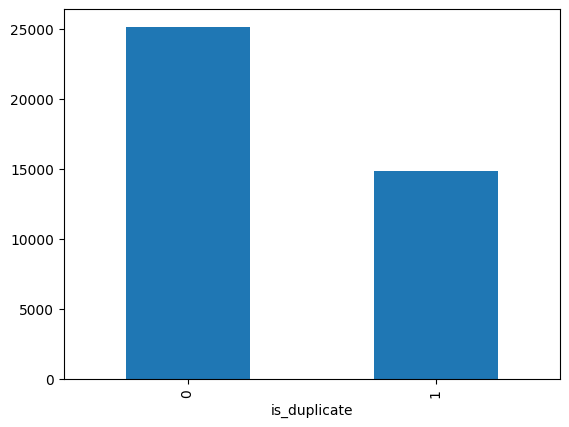

In [9]:
#Count of duplicate values 
print(new_df['is_duplicate'].value_counts())

#count of duplicate values(in %)
print(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count()*100)

new_df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated Questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions:', np.unique(qid).shape[0])

x = qid.value_counts()>1
print('Number of questions getting repeated:', x[x].shape[0])

Number of unique questions: 72298
Number of questions getting repeated: 5345


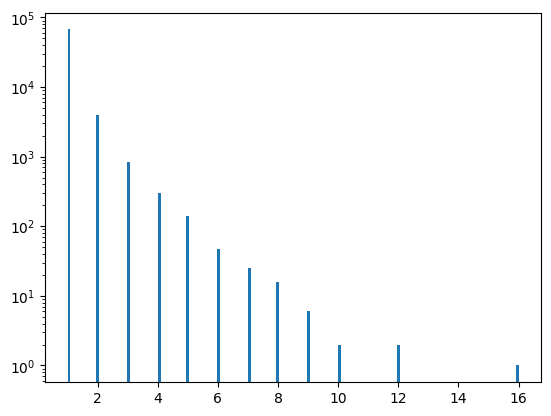

In [11]:
#Repeated Questions Histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

### Feature Engineering 

In [12]:
#Length of Question1 & Question2
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
31500,31500,58072,58073,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...,0,32,58
270887,270887,54575,10365,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/...",1,153,142
384362,384362,516388,516389,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...,0,58,57
72809,72809,125038,125039,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...,0,91,82
147054,147054,124558,6851,Why do we need to reading books?,Why should we read more books?,1,32,30


In [14]:
#Count no. of words
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
31500,31500,58072,58073,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...,0,32,58,6,10
270887,270887,54575,10365,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/...",1,153,142,22,19
384362,384362,516388,516389,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...,0,58,57,11,11
72809,72809,125038,125039,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...,0,91,82,17,13
147054,147054,124558,6851,Why do we need to reading books?,Why should we read more books?,1,32,30,7,6


In [16]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [17]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
31500,31500,58072,58073,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...,0,32,58,6,10,1
270887,270887,54575,10365,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/...",1,153,142,22,19,11
384362,384362,516388,516389,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...,0,58,57,11,11,10
72809,72809,125038,125039,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...,0,91,82,17,13,3
147054,147054,124558,6851,Why do we need to reading books?,Why should we read more books?,1,32,30,7,6,3


In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [20]:
new_df['word_total'] = new_df.apply(total_words, axis=1)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
31500,31500,58072,58073,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...,0,32,58,6,10,1,16
270887,270887,54575,10365,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/...",1,153,142,22,19,11,37
384362,384362,516388,516389,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...,0,58,57,11,11,10,22
72809,72809,125038,125039,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...,0,91,82,17,13,3,27
147054,147054,124558,6851,Why do we need to reading books?,Why should we read more books?,1,32,30,7,6,3,13


In [22]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
31500,31500,58072,58073,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...,0,32,58,6,10,1,16,0.06
270887,270887,54575,10365,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/...",1,153,142,22,19,11,37,0.30
384362,384362,516388,516389,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...,0,58,57,11,11,10,22,0.45
72809,72809,125038,125039,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...,0,91,82,17,13,3,27,0.11
147054,147054,124558,6851,Why do we need to reading books?,Why should we read more books?,1,32,30,7,6,3,13,0.23


#### Analysis on Features

Minimum Characters 1
Maximum Characters 350
Average No of Characters 59


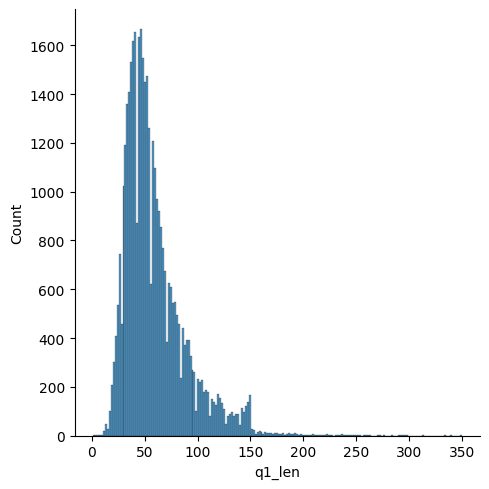

In [24]:
sns.displot(new_df['q1_len'])
print('Minimum Characters', new_df['q1_len'].min())
print('Maximum Characters', new_df['q1_len'].max())
print('Average No of Characters', int(new_df['q1_len'].mean()))

Minimum Characters 5
Maximum Characters 387
Average No of Characters 59


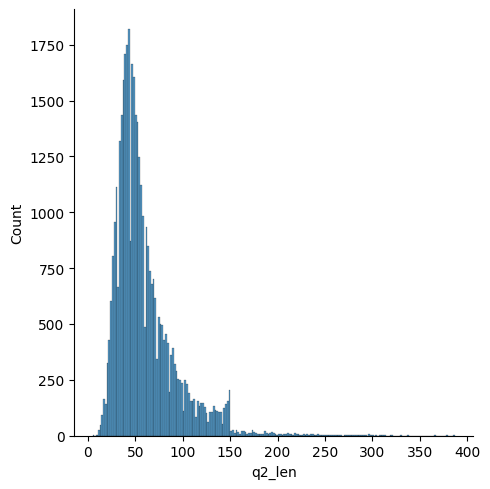

In [25]:
sns.displot(new_df['q2_len'])
print('Minimum Characters', new_df['q2_len'].min())
print('Maximum Characters', new_df['q2_len'].max())
print('Average No of Characters', int(new_df['q2_len'].mean()))

Minimum Characters 1
Maximum Characters 67
Average No of Characters 10


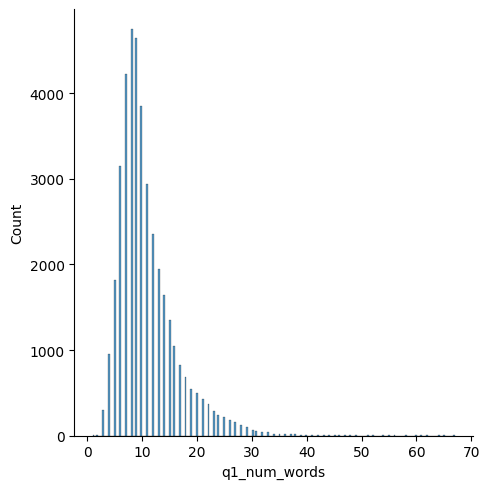

In [26]:
sns.displot(new_df['q1_num_words'])
print('Minimum Characters', new_df['q1_num_words'].min())
print('Maximum Characters', new_df['q1_num_words'].max())
print('Average No of Characters', int(new_df['q1_num_words'].mean()))

Minimum Characters 1
Maximum Characters 78
Average No of Characters 11


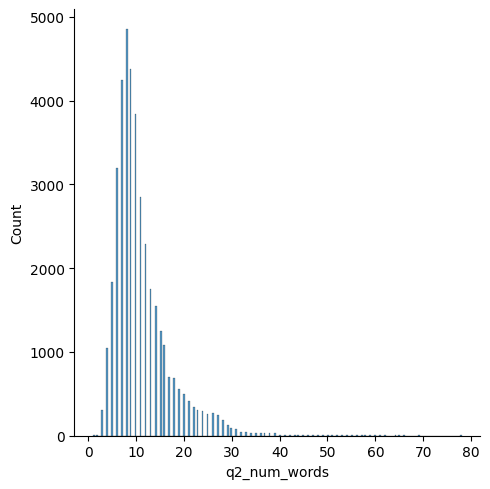

In [27]:
sns.displot(new_df['q2_num_words'])
print('Minimum Characters', new_df['q2_num_words'].min())
print('Maximum Characters', new_df['q2_num_words'].max())
print('Average No of Characters', int(new_df['q2_num_words'].mean()))

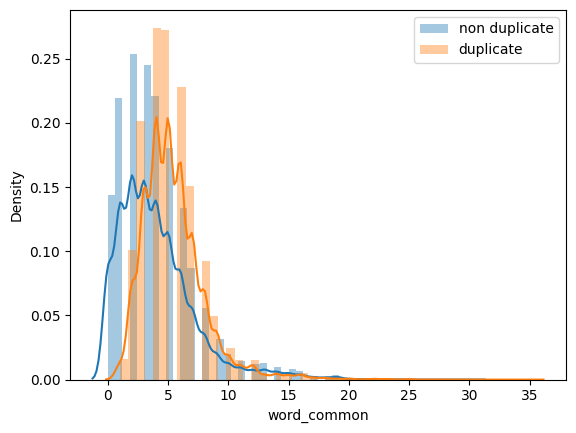

In [28]:
#common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label='duplicate')
plt.legend()
plt.show()

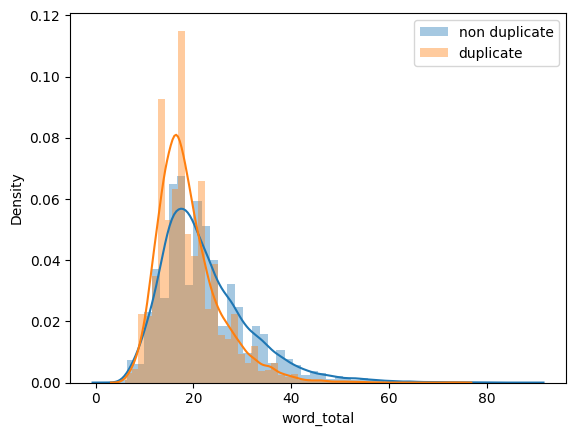

In [29]:
#total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'], label='duplicate')
plt.legend()
plt.show()

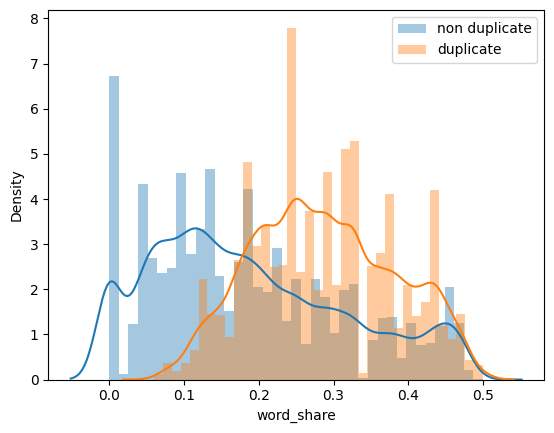

In [30]:
#word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label='duplicate')
plt.legend()
plt.show()

In [31]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
31500,Why did Rangers sack Scot Symon?,Why Indians want Kashmiris to be solely depend...
270887,If universe expands without limit and dark/vac...,"If universe expands and more space-time, dark/..."
384362,What are some good nutrition tips to keep a he...,What are some good nutrition tips to keep a he...
72809,"If I'm near-sighted, will keeping my glasses o...",Why does my computer/smartphone/TV screen hurt...
147054,Why do we need to reading books?,Why should we read more books?


In [32]:
final_df = new_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(40000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
31500,0,32,58,6,10,1,16,0.06
270887,1,153,142,22,19,11,37,0.30
384362,0,58,57,11,11,10,22,0.45
72809,0,91,82,17,13,3,27,0.11
147054,1,32,30,7,6,3,13,0.23


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [34]:
cv = CountVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [35]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [36]:
temp_df.shape

(40000, 8000)

In [37]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(40000, 8008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
31500,0,32,58,6,10,1,16,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
270887,1,153,142,22,19,11,37,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
384362,0,58,57,11,11,10,22,0.45,0,0,...,0,0,0,0,0,0,0,0,0,0
72809,0,91,82,17,13,3,27,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0
147054,1,32,30,7,6,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:, -1].values, 
                                                    test_size=0.2, stratify=temp_df.iloc[:, -1].values, random_state=42)

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9995

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[7995,    0],
       [   4,    1]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7995
           1       1.00      0.20      0.33         5

    accuracy                           1.00      8000
   macro avg       1.00      0.60      0.67      8000
weighted avg       1.00      1.00      1.00      8000



In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]))

In [47]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test, y_pred1)

0.999625

In [49]:
confusion_matrix(y_test, y_pred1)

array([[7994,    1],
       [   2,    3]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7995
           1       0.75      0.60      0.67         5

    accuracy                           1.00      8000
   macro avg       0.87      0.80      0.83      8000
weighted avg       1.00      1.00      1.00      8000

